### Introduction
The Tanzanian Ministry of Water is seeking to solve the ongoing water crisis in Tanzania by increasing the number of functioning water wells.  Residents having easy access to drinking water is crucial to the health and safety of communities.  This is an important problem for utilizing predictive modeling to aid in solving this problem.  Tanzania has a lot of water wells that are non-functioning or in need of repair.<br>  
My objective is to build classification models that will predict the operating status of water wells based on features in the dataset.  The data was gathered by Taarifa from the Tanzanian Ministry of Water and consist of over 59,400 data points of water well pumps in Tanzania and 40 features. These records indicate the status of the functionality of these pumps along with features of the pumps, such as install date, location, pump type, etc.  The functioning status of the wells are identifed as  functioning, non-functioning or functioning but in need of repairs.  In addition, I will provide an analysis and visualizations of data to provide insights and information about how various features impact the operating status of water wells, e.g., if wells are in a certain region what is the liklihood they'll be functioning or non-functioning.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

import warnings
warnings.filterwarnings("ignore")

In [2]:
"""

amount_tsh : Total static head (amount water available to waterpoint)
date_recorded : The date the row was entered
funder : Who funded the well
gps_height : Altitude of the well
installer : Organization that installed the well
longitude : GPS coordinate
latitude : GPS coordinate
wpt_name : Name of the waterpoint if there is one
num_private :Private use or not
basin : Geographic water basin
subvillage : Geographic location
region : Geographic location
region_code : Geographic location (coded)
district_code : Geographic location (coded)
lga : Geographic location
ward : Geographic location
population : Population around the well
public_meeting : True/False
recorded_by : Group entering this row of data
scheme_management : Who operates the waterpoint
scheme_name : Who operates the waterpoint
permit : If the waterpoint is permitted
construction_year : Year the waterpoint was constructed
extraction_type : The kind of extraction the waterpoint uses
extraction_type_group : The kind of extraction the waterpoint uses
extraction_type_class : The kind of extraction the waterpoint uses
management : How the waterpoint is managed
management_group : How the waterpoint is managed
payment : What the water costs
payment_type : What the water costs
water_quality : The quality of the water
quality_group : The quality of the water
quantity : The quantity of water
quantity_group : The quantity of water
source : The source of the water
source_type : The source of the water
source_class : The source of the water
waterpoint_type : The kind of waterpoint
waterpoint_type_group : The kind of waterpoint
"""
pd.set_option('display.max_columns', None)  
df_1 = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')
df_1['target'] = labels['status_group']

In [3]:
df_1['target'] = df_1['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df_1.drop('id',axis=1, inplace=True)

In [4]:

df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


### Exploratory Data Analysis

In [5]:
df_1.shape

(59400, 40)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [7]:
#df_1.nunique()
def unique_values(df):
    info_df = df.info()
    print(dashes)
    print('\n')
    num_unique = df.nunique()
    print("Number of uniques values in each Feature/Column:")
    
    return num_unique

unique_values(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

#### Null Values

In [8]:
def nan_more_fifty(df): 
    for column in df:
        if df[column].isnull().sum()*100.0/df.shape[0] > 50:
            df.drop(column,1, inplace=True)
        #else:
    print('There are no columns with more than 50% null values')
    return df        

In [9]:
revised = nan_more_fifty(df_1)

There are no columns with more than 50% null values


The following features have null values:
 Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')


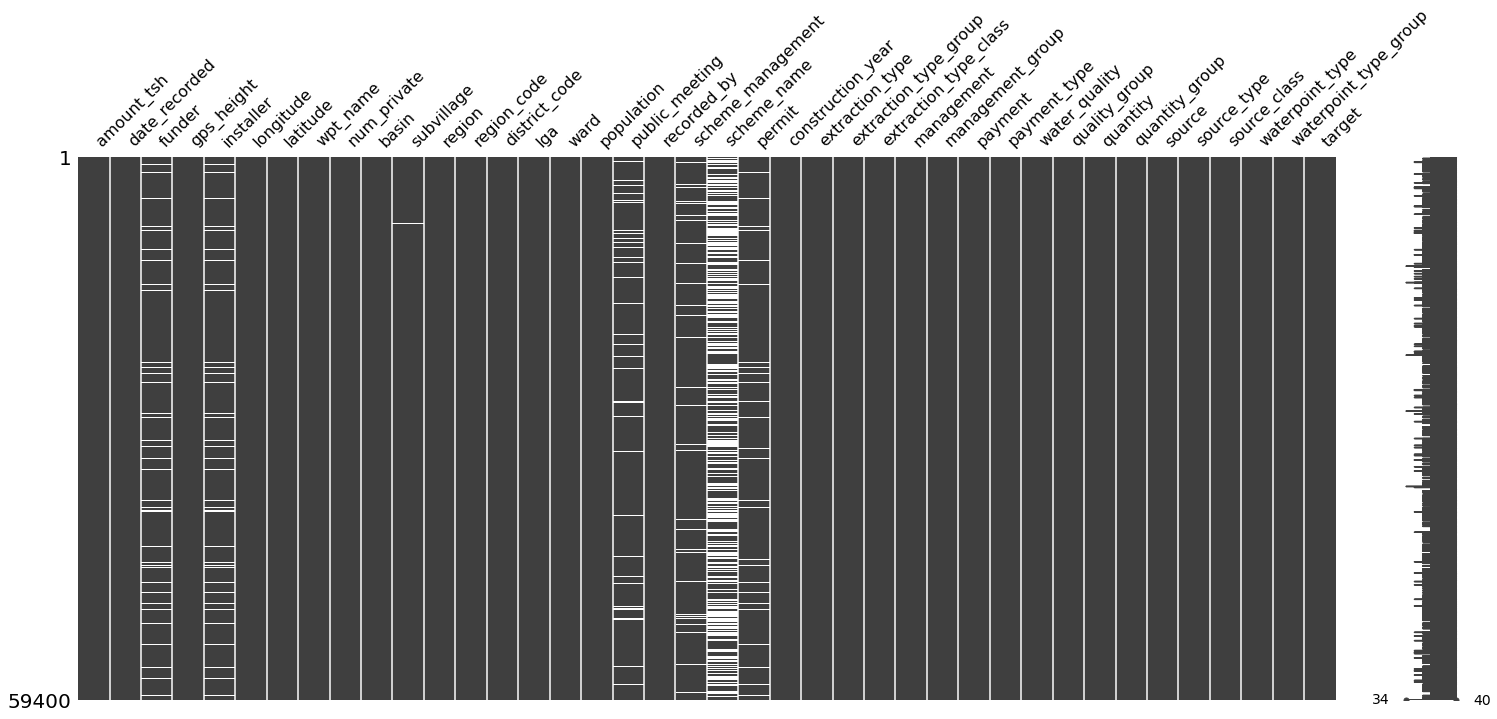

In [10]:
def count_null(df):
    """
    function displays features that have Nan values 
    """
    #only features w/null values
    null_columns=df.columns[df.isnull().any()]
    test = df[null_columns].isnull().sum()
    if test.empty:
        print('No nulls')
    else:
        print(f'The following features have null values:\n {null_columns}')
    
    # Visualize missing values as a matrix 
    msno.matrix(df) 
    
    return test
    
nan_values = count_null(df_1)  

#### Columns with '0' values 

In [11]:
columns_0 = df_1.columns[df_1.isin(['0']).any()] 
print(f"The following columns have a string with value of '0': {columns_0}")

The following columns have a string with value of '0': Index(['funder', 'installer'], dtype='object')


In [12]:
df_1.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,target
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,0.529596
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.628080
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,0.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,1.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2.000000


### Visualization

In [13]:
def feature_distribution(data, col= None, ticklabels=None, figsize=None):
    """
    plots a seaborn countplot for feature w/customization
    
    Args
        df (df)
        col (int or str)
        figsize (dict)
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data, x=col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

In [14]:
def feature_w_hue(df, col= None, hue_col=None, rot=None, figsize=None):
    """
    plots a seaborn countplot for column and hue w/customization
    Args
    df (dataframe)
    col (int or str)
    hue_col (int or str)
    rot(rotate x label)
    figsize (dict)
    """
    print(df[col].value_counts(dropna=False))
    print('\n')
    print(round(df[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
    fig,ax = plt.subplots(figsize=figsize)
    #sns.countplot(data=data, x=col, ax=ax)
    sns.countplot(data=df, x=col, hue=hue_col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    #ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_title(f'How {col.title()} relates to {hue_col.title()}',fontdict=label_font)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':rot,'ha':'right'}); 
    #ax.set_xticklabels(ticklabels)

#### target
The label has 3 categories.  0 stands for wells that are functioning. 1 represents wells that don't work and 2 is for wells that work but need repair.<br>
<br>
The feature consists of 54% of wells that function.  38% are wells that don't function and 7% of the wells work but need to be repaired.  The 'target' is imbalanced because there such a big difference in the distrubtion between the categories.  

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


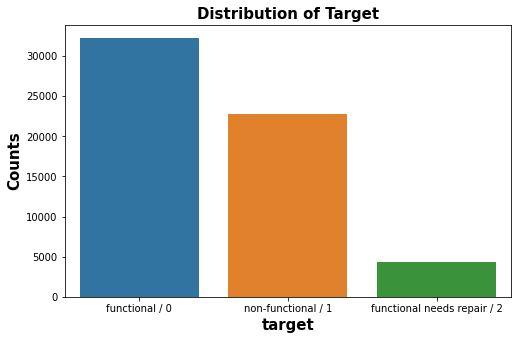

In [15]:
feature_distribution(df_1, col='target',ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

#### amount_tsh
Feature is defined as the total static head or the amount of water available to waterpoint.  Column 'population' is defined as the population around the well.  I created a new column 'water_per_person' to show how much water is available for population around the well.
<br>
Problem with 'amount_tsh' is that 70% of feature doesn't have a reported amount of water.  Also, for 'population' 35% of feature doesn't has a reported value 0f 0 and 12% has a reported value of 1.

In [16]:
df_1['amount_tsh'].value_counts(normalize=True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [17]:
df_1['amount_tsh'].loc[(df_1['amount_tsh'] == 0.0)] = np.NaN

In [18]:
df_1['amount_tsh'] = df_1['amount_tsh'].fillna(df_1['amount_tsh'].median())

#### district_code

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64


1     0.205
2     0.188
3     0.168
4     0.151
5     0.073
6     0.069
7     0.056
8     0.018
30    0.017
33    0.015
53    0.013
43    0.009
13    0.007
23    0.005
63    0.003
62    0.002
60    0.001
0     0.000
80    0.000
67    0.000
Name: district_code, dtype: float64
---------------------------------------------


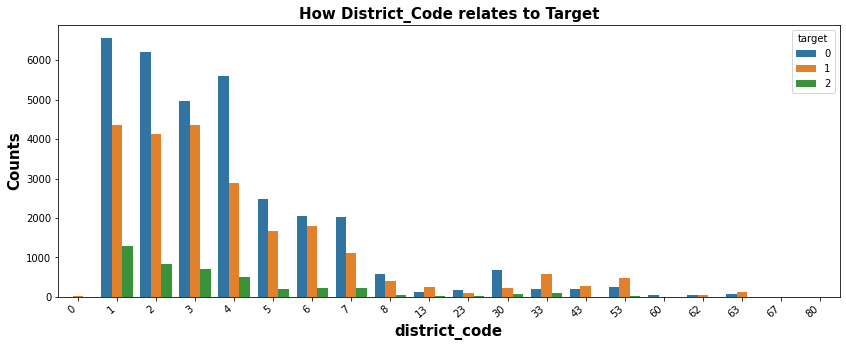

In [19]:
feature_w_hue(df_1, col='district_code', hue_col='target',rot=40,figsize=(14,5))

#### population

In [20]:
df_1['population'].value_counts(normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

In [21]:
df_1['population'].isna().sum()

0

In [22]:
# df_1['population'].loc[(df_1['population'] == 0)] = np.NaN
# df_1['population'].loc[(df_1['population'] == 1)] = np.NaN


In [23]:
df_1['population'].isna().sum()

0

In [24]:
df_2 = df_1.copy()

In [25]:
#df = df.fillna(df.median())
# df_1['population'] = df_1['population'].fillna(df_1['population'].median())

level = []
for i in range(0,len(df_1)):
    pop_range = int(df_1['population'][i])
    if pop_range ==0:
        level.append('0')
    elif pop_range == 1:
        level.append('1')
    elif pop_range >= 2 and pop_range < 5000:
        level.append('2 to 5,000')
#     elif pop_range >= 5001 and pop_range < 10000:
#         level.append("5,001 to 10,000")
        
#     elif pop_range >= 10001 and pop_range < 20000:
#         level.append("10,001 to 20,000")    
    else:
        level.append("5,001 and above")   

df_1['population_levels'] = level
df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,"2 to 5,000"
1,250.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,"2 to 5,000"
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,"2 to 5,000"
3,250.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,"2 to 5,000"
4,250.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,0


In [26]:
df_1['population_levels'].value_counts(normalize=True)

2 to 5,000         0.519714
0                  0.359949
1                  0.118266
5,001 and above    0.002071
Name: population_levels, dtype: float64

2 to 5,000         30871
0                  21381
1                   7025
5,001 and above      123
Name: population_levels, dtype: int64


2 to 5,000         0.520
0                  0.360
1                  0.118
5,001 and above    0.002
Name: population_levels, dtype: float64
---------------------------------------------


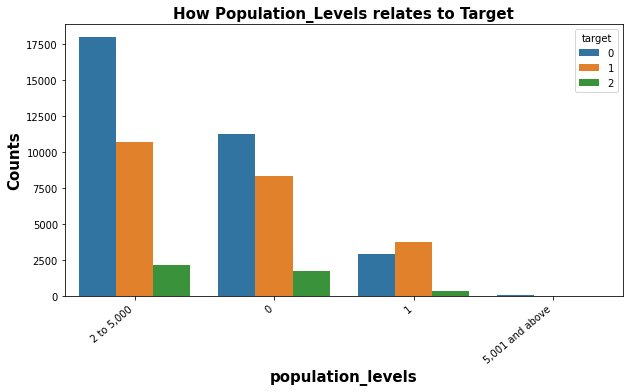

In [27]:
feature_w_hue(df_1, col='population_levels', hue_col='target',rot=40,figsize=(10,5))

In [28]:
#df_2['Level_labels'].dtype

In [29]:
df_1['population'].value_counts(dropna=False)

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [30]:
df_1['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [31]:
# fig,ax = plt.subplots(figsize=(15,6))
# sns.countplot(x='population',data=df_1);
# ax.set_title("Distribution of 'construction_year'")
# ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':40,'ha':'right'});

In [32]:
df_1['water_per_person'] = df_1['amount_tsh'] / df_1['population']

In [33]:
df_1.head(50)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,"2 to 5,000",55.045872
1,250.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,"2 to 5,000",0.892857
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,"2 to 5,000",0.100000
3,250.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,"2 to 5,000",4.310345
4,250.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,0,inf
5,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,0,1,20.000000
6,250.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1,0,inf
7,250.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1,0,inf
8,250.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,1,0,inf
9,250.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,eno

In [34]:
df_1['water_per_person'].value_counts(normalize=True)

inf            0.359949
250.000000     0.083098
1.000000       0.022542
1.666667       0.022003
1.250000       0.020909
                 ...   
0.271739       0.000017
0.184502       0.000017
1.307190       0.000017
6.870229       0.000017
1750.000000    0.000017
Name: water_per_person, Length: 2393, dtype: float64

In [35]:
df_1['water_per_person'].dtype

dtype('float64')

#### installer
Feature 'installer' is defined as organization that installed the well.  A question to consider is whether the installer of the wells has any role in whether the wells functions.  The largest category of 'installer' is DWE which constitutes 85% of this category. The second largest is governmen which is 9% of this category.  In DWE, about 9050 wells are functioning. But around 6050 wells are not functioning and around 1075 function but need repairs.  With government the number of non-functioning wells (around 1000) exceed the functioning (around 500).  Consider whether proper installation and whether it can be approved.  

In [36]:
df_1['installer'].value_counts(dropna=False)

DWE            17402
NaN             3655
Government      1825
RWE             1206
Commu           1060
               ...  
Masjid Nnre        1
DANIAD             1
GD&ID              1
Primo              1
Babu Sajini        1
Name: installer, Length: 2146, dtype: int64

In [37]:
installer = df_1['installer'].value_counts(dropna=False).head(10)

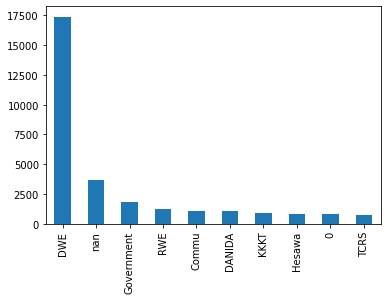

In [38]:
installer.plot(kind='bar')

In [39]:
dwe_gov = df_1[(df_1['installer'] == 'DWE') | (df_1['installer']== 'Government') |
                (df_1['installer']== 'RWE')]

In [40]:
dwe_gov.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person
5,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,0,1,20.000000
7,250.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1,0,inf
15,250.0,2011-08-04,Rudep,1645,DWE,31.444121,-8.274962,Kwa Juvenal Ching'Ombe,0,Lake Tanganyika,Tunzi,Rukwa,15,2,Sumbawanga Rural,Mkowe,200,True,GeoData Consultants Ltd,VWC,NaN,False,1991,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0,"2 to 5,000",1.250000
16,500.0,2011-07-04,Unicef,1703,DWE,34.642439,-9.106185,Kwa John Mtenzi,0,Rufiji,Kidudumo,Iringa,11,4,Njombe,Mdandu,35,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,1,"2 to 5,000",14.285714
17,250.0,2011-09-04,Unicef,1656,DWE,34.569266,-9.085515,Kwa Rose Chaula,0,Rufiji,Yeriko,Iringa,11,4,Njombe,Usuka,50,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,pay when scheme fails,on failure,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,1,"2 to 5,000",5.000000


DWE           17402
Government     1825
RWE            1206
Name: installer, dtype: int64


DWE           0.852
Government    0.089
RWE           0.059
Name: installer, dtype: float64
---------------------------------------------


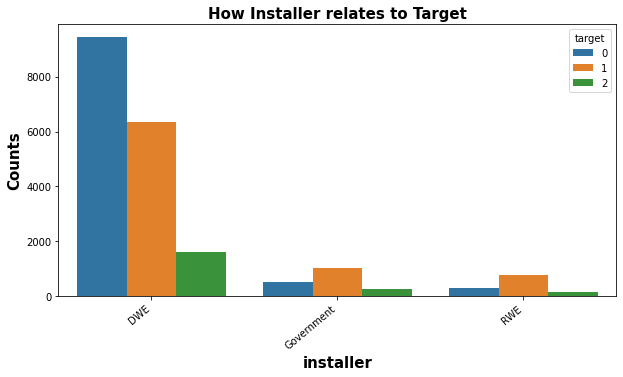

In [41]:
feature_w_hue(dwe_gov, col='installer', hue_col='target',rot=40,figsize=(10,5))

#### basin

basin is defined as geographic water basin. Lake Victoria, Pangani, Rufiji and Internal have the highest number of wells. Lake Victoria is 17% of the category.  Lake Victoria has a little over 5,000 funcitoning wells and over 4,000 non-functionig wells.  Rufiji is 13% of the category and has a little over 5,000 wells that work and approximately 2,500 number non-functioning wells.  This is important so that the differences in the basins can be explored, ie, why does Rufiji have a higher number of functioning wells and fewer non-fucntioning compared to the others.  What are the differnces and similarities in these wells. 



Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


Lake Victoria              0.173
Pangani                    0.151
Rufiji                     0.134
Internal                   0.131
Lake Tanganyika            0.108
Wami / Ruvu                0.101
Lake Nyasa                 0.086
Ruvuma / Southern Coast    0.076
Lake Rukwa                 0.041
Name: basin, dtype: float64
---------------------------------------------


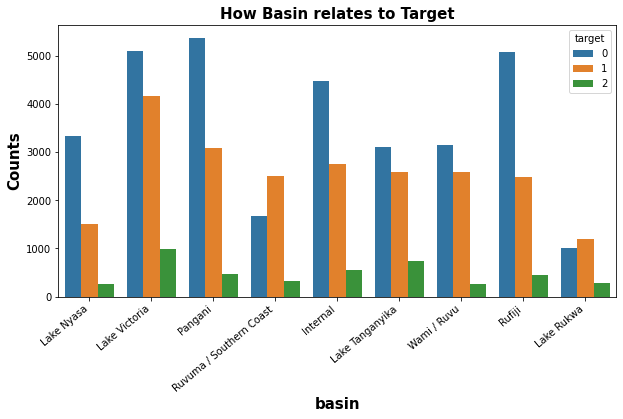

In [42]:
feature_w_hue(df_1, col='basin', hue_col='target',rot=40,figsize=(10,5))

In [43]:
basin = pd.crosstab(df_1['basin'],df_1['target'])
basin

target,0,1,2
basin,,,
Internal,4482,2746,557
Lake Nyasa,3324,1511,250
Lake Rukwa,1000,1184,270
Lake Tanganyika,3107,2583,742
Lake Victoria,5100,4159,989
Pangani,5372,3091,477
Rufiji,5068,2471,437
Ruvuma / Southern Coast,1670,2497,326
Wami / Ruvu,3136,2582,269


#### region
Feature 'region' is defined as the geographic location.  Iringa, Shinaya, Mbeya are the largest categories in this feature.  Iringa also has the largest number of functioning wells with over 4,000 wells and a little over 1,000 non-fucntioning wells. In contrast regions like Mbeya have close to the same amount of wells that function and do not function.  Need to investigate what Iringa is doing correctly for insights to be applied in other basins.  Also, more concentration on other regions with higher numbers of non-fucntioning wells.

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64


Iringa           0.089
Shinyanga        0.084
Mbeya            0.078
Kilimanjaro      0.074
Morogoro         0.067
Arusha           0.056
Kagera           0.056
Mwanza           0.052
Kigoma           0.047
Ruvuma           0.044
Pwani            0.044
Tanga            0.043
Dodoma           0.037
Singida          0.035
Mara             0.033
Tabora           0.033
Rukwa            0.030
Mtwara           0.029
Manyara          0.027
Lindi            0.026
Dar es Salaam    0.014
Name: region, dtype: float

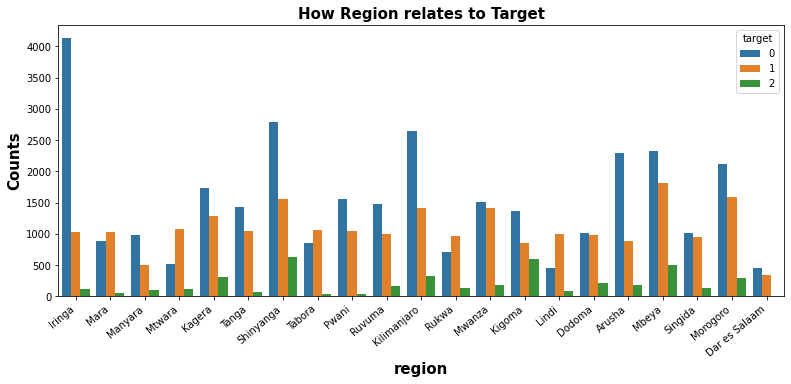

In [44]:
feature_w_hue(df_1, col='region', hue_col='target',rot=40,figsize=(13,5))

In [45]:
df_1[(df_1['region'] == 'Iringa') | (df_1['region']== 'Shinyanga')]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,"2 to 5,000",55.045872
6,250.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1,0,inf
7,250.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1,0,inf
12,250.0,2012-10-14,World Vision,0,World vision,33.798106,-3.290194e+00,Pamba,0,Internal,Nkilifa,Shinyanga,17,2,Maswa,Busilili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0,0,inf
14,250.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333e+00,Mwabasabi,0,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59371,250.0,2012-10-09,Netherlands,0,DWE,33.586406,-3.040369e+00,Ushirika,0,Lake Victoria,Chambwa,Shinyanga,17,2,Maswa,Kulimi,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1,0,inf
59374,250.0,2012-10-29,Rwssp,0,DWE,0.000000,-2.000000e-08,Nguvu Kazi,0,Lake Victoria,Mwamtani A,Shinyanga,17,1,Bariadi,Sagata,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0,0,inf
59378,500.0,2011-03-21,Rc,2101,ACRA,34.620387,-9.358405e+00,Michael Msigwa,0,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,"2 to 5,000",13.888889
59380,6000.0,2011-03-14,Roman,1439,Roman,34.942101,-9.849198e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,50,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,1,"2 to 5,000",120.000000


#### permit
Whether a permit was taken out does it have an impact on whether the wells is non-funcitoning. The category of taking out a permit is 69% of the category. Over 20,000 wells that were built with permits function but 15,000 don't function. There 2,500 that funciton but need repairs. Around 9,000 fucntioning wells with no permit and around 7,000 are non-functiong.  With permits thee are higher number of wells that function but there is also a high number that don't function.    

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64


True     0.69
False    0.31
Name: permit, dtype: float64
---------------------------------------------


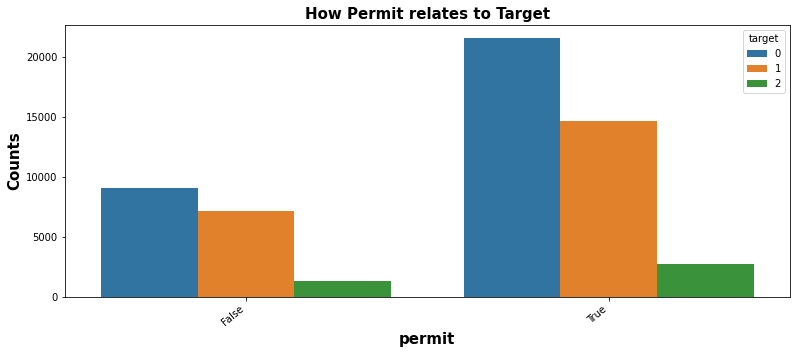

In [46]:
feature_w_hue(df_1, col='permit', hue_col='target',rot=40,figsize=(13,5))

#### construction_year
Feature 'construction_year' is defined as the year the waterpoint was constructed. Feature is an int datatype. Data is from 1960 to 2013.  An issue is that 35% of the feature has a value of 0. The next largest category is year 2010 with 4% and then year 2008 with 4%.

In [47]:
df_1['construction_year'].value_counts(normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

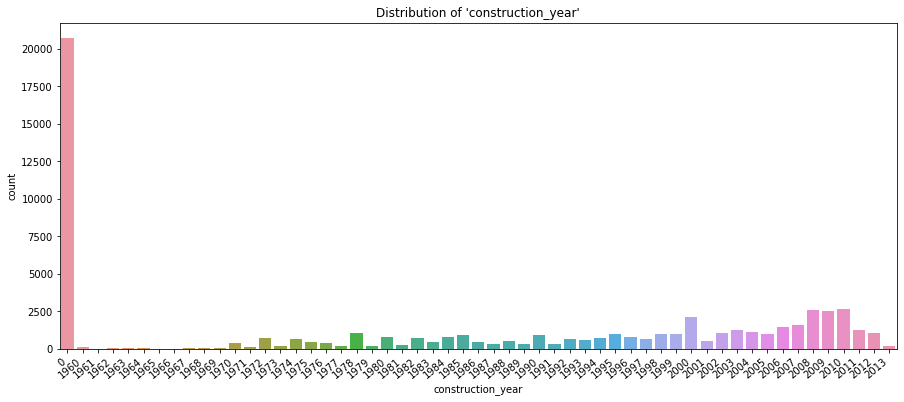

In [48]:
#feature_distribution(df_1, col='construction_year',ticklabels=['construction_year'.index],figsize=(8,5))
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(x='construction_year',data=df_1);
ax.set_title("Distribution of 'construction_year'")
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':40,'ha':'right'});

In [49]:
df_1['no_construct_yr'] = df_1['construction_year']== 0

In [50]:
df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person,no_construct_yr
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,"2 to 5,000",55.045872,False
1,250.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,"2 to 5,000",0.892857,False
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,"2 to 5,000",0.100000,False
3,250.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,"2 to 5,000",4.310345,False
4,250.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,0,inf,True


Text(0.5, 1.0, 'Water Pump Construction by Years')

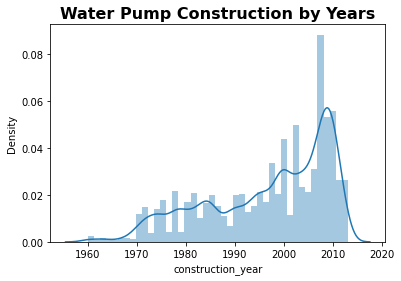

In [51]:
sns.distplot(df_1['construction_year'][df_1['construction_year']>0]);
plt.title("Water Pump Construction by Years", fontsize=16, fontweight='bold')

In [52]:
years = df_1[df_1['construction_year'] > 1999] 

2010    2645
2008    2613
2009    2533
2000    2091
2007    1587
2006    1471
2003    1286
2011    1256
2004    1123
2012    1084
2002    1075
2005    1011
2001     540
2013     176
Name: construction_year, dtype: int64


2010    0.129
2008    0.128
2009    0.124
2000    0.102
2007    0.077
2006    0.072
2003    0.063
2011    0.061
2004    0.055
2012    0.053
2002    0.052
2005    0.049
2001    0.026
2013    0.009
Name: construction_year, dtype: float64
---------------------------------------------


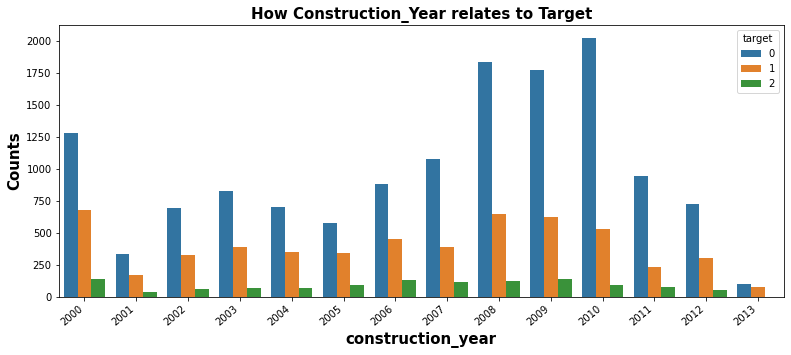

In [53]:
feature_w_hue(years, col='construction_year', hue_col='target',rot=40,figsize=(13,5))

#### quantity

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


enough          0.559
insufficient    0.255
dry             0.105
seasonal        0.068
unknown         0.013
Name: quantity, dtype: float64
---------------------------------------------


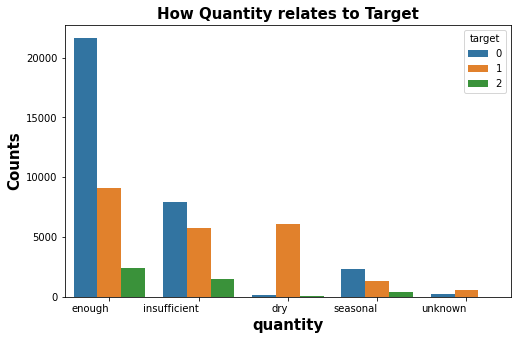

In [54]:
feature_w_hue(df_1, col='quantity', hue_col='target',rot=None,figsize=(8,5))

#### management_group

In [55]:
"""
usergroup is the largest entites/management groups involved in water wells.  
vwc is the largest in hte management_group. 

"""
df_1.groupby(['management_group','management']).count() 

amount_tsh  date_recorded  funder  \
management_group management                                            
commercial       company                  685            685     663   
                 private operator        1971           1971    1957   
                 trust                     78             78      78   
                 water authority          904            904     836   
other            other                    844            844     837   
                 other - school            99             99      99   
parastatal       parastatal              1768           1768    1624   
unknown          unknown                  561            561     533   
user-group       vwc                    40507          40507   37632   
                 water board             2933           2933    2715   
                 wua                     2535           2535    2308   
                 wug                     6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  basin  subvillage  \
management_group management                                                   
commercial       company                685          685    685         685   
                 private operator      1971         1971   1971        1932   
                 trust                   78           78     78          78   
                 water authority        904          904    904         895   
other            other                  844          844    844         839   
                 other - school          99           99     99          99   
parastatal       parastatal            1768         1768   1768        1768   
unknown          unknown                561          561    561         561   
user-group       vwc                  40507        40507  40507       40189   
                 water board           2933         2933   2933        2933   
                 wua                   2535         2535   2535        2535   
                 wug                   6515         6515   6515        6515   

                                   region  region_code  district_code    lga  \
management_group management                                                    
commercial       company              685          685            685    685   
                 private operator    1971         1971           1971   1971   
                 trust                 78           78             78     78   
                 water authority      904          904            904    904   
other            other                844          844            844    844   
                 other - school        99           99             99     99   
parastatal       parastatal          1768         1768           1768   1768   
unknown          unknown              561          561          

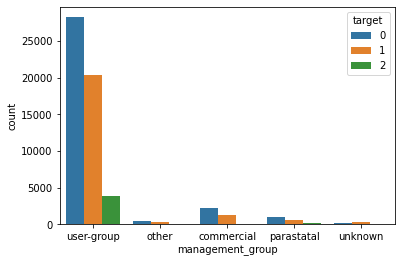

In [56]:
sns.countplot(x='management_group',data=df_1, hue='target');

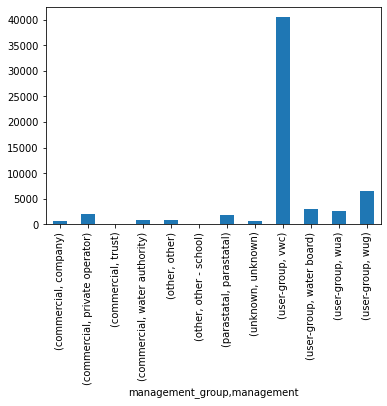

In [57]:
df_1.groupby(['management_group','management']).count()['target'].plot(kind='bar')

#### payment
payment is defined as what the water cost.  The largest category in the feature is never pay which is 42% of the feature.  The next largest categories are pay per bucket which 15% of feature and pay monthly which is 14% of the feature.<br>
<br>
A question is whether paying for water impacts the liklihood of whether a well works or not. For wells where no payment is made, 48% wells didn't work, 45% wells worked and 8% work but need repairs.  So when the water is not paid for there is almost an equal chance that it will work on not work.

In [58]:
df_1['payment_type'].value_counts(dropna=False)

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64


never pay                0.427
pay per bucket           0.151
pay monthly              0.140
unknown                  0.137
pay when scheme fails    0.066
pay annually             0.061
other                    0.018
Name: payment, dtype: float64
---------------------------------------------


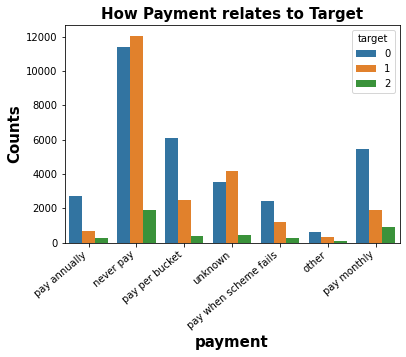

In [59]:
feature_w_hue(df_1, col='payment', hue_col='target',rot=40)   

In [60]:
never_pay = df_1[df_1['payment']== 'never pay']
never_pay.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person,no_construct_yr
1,250.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,"2 to 5,000",0.892857,False
3,250.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,"2 to 5,000",4.310345,False
4,250.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,0,inf,True


In [61]:
never_pay['target'].value_counts(normalize=True)

1    0.475856
0    0.448911
2    0.075233
Name: target, dtype: float64

#### quality_group
This feature is defined as the quality of the water. The largest category is good which is 85% of the category. There are almost 30,000 wells that have good water that are functional, but there are also almost 20,000 wells that aren't functioning.<br>
<br>
This is a crucal factor to work with because the water is considered good and now concentrate on getting the wells working.<br>

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


good        0.856
salty       0.087
unknown     0.032
milky       0.014
colored     0.008
fluoride    0.004
Name: quality_group, dtype: float64
---------------------------------------------


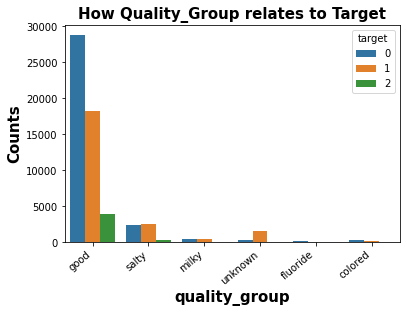

In [62]:
#ax = sns.countplot(x='quality_group', hue="target", data=df_1)
#countplot_w_hue(df_1, col='quality_group', hue_col='target',rot=40)  
feature_w_hue(df_1, col='quality_group', hue_col='target',rot=40) 

### Preprocessing

In [63]:
"""
Features contain similar data:
extraction_type
extraction_type_group
extraction_type_class 

(payment, payment_type),

(water_quality, quality_group), 

(source, source_class), 

(subvillage, region, region_code, district_code, lga, ward), 

(waterpoint_type, waterpoint_type_group)  
Risk overfitting our data during training by including all the features in our analysis, which can be dropped.

id can be droped because it is unique for each instance.
num_private is ~99% zeros



"""
print('Features which may be duplicative')

Features which may be duplicative


In [64]:
"""
some of the features that seemed to impact prediction of whether wells functions based on intuition. 
amount_tsh (amount of water available to water point)
gps_height, basin, installer, population, scheme_management, construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in identifying the pump status.



"""

'\nsome of the features that seemed to impact prediction of whether wells functions based on intuition. \namount_tsh (amount of water available to water point)\ngps_height, basin, installer, population, scheme_management, construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in identifying the pump status.\n\n\n\n'

#### funder 
Column 'funder' is defined as who funded the well.<br>
Nan values: 3635<br>
'0': 777<br>
categories that have unique values of 10 or less: 3001<br> 
<br>
Categories with unique values of 10 or less were grouped in category titled 'other'<br>

In [65]:
"""
funder                    1897
installer                 2145


NaN: 3635
'0': 777
"""
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Said Salum Ally              1
Sipdo                        1
Ccpk                         1
Zao                          1
Eastmeru Medium School       1
Name: funder, Length: 1898, dtype: int64

In [66]:
len(df_1[df_1['funder']== '0'])

777

In [67]:
#df_a = df_a.apply(lambda x: x.mask(x.map(x.value_counts())< 10, np.NaN) if x.name=='funder' else x)
#funder
#df_1['funder'].loc[(df_1['funder'] == '0')] = np.NaN
df_1.loc[(df_1['funder'] == '0'),'funder'] = np.NaN

In [68]:
"""
NaN: 3635
"""
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Said Salum Ally              1
Sipdo                        1
Ccpk                         1
Zao                          1
Eastmeru Medium School       1
Name: funder, Length: 1897, dtype: int64

In [69]:
df_1[df_1['funder']== '0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person,no_construct_yr


In [70]:
df_1 = df_1.apply(lambda x: x.mask(x.map(x.value_counts())< 10, 'other') if x.name=='funder' else x)

In [71]:
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       4412
Danida                    3114
other                     3001
Hesawa                    2202
                          ... 
Kmcl                        10
Dhv/gove                    10
Auwasa                      10
Millenium                   10
Sijm                        10
Name: funder, Length: 407, dtype: int64

#### installer
Column 'installer' is defined as the organization that installed the well.<br>
unique values: 2145<br>
NaN: 3655<br>
'0': 777<br>
<br>
categories of unique values with a count of 10 or less were grouped in a category called 'other'.<br> 

In [72]:
"""
installer unique: 2145

NaN: 3655
0:   777

"""
df_1['installer'].value_counts(dropna=False)

DWE            17402
NaN             3655
Government      1825
RWE             1206
Commu           1060
               ...  
Masjid Nnre        1
DANIAD             1
GD&ID              1
Primo              1
Babu Sajini        1
Name: installer, Length: 2146, dtype: int64

In [73]:
len(df_1[df_1['installer']=='0'])

777

In [74]:
df_1['installer'].loc[(df_1['installer'] == '0')] = np.NaN

In [75]:
#pd.set_option('display.max_rows', None)
#counting = df_1['installer'].value_counts()
df_1 = df_1.apply(lambda x: x.mask(x.map(x.value_counts())< 10, 'other') if x.name=='installer' else x)

In [76]:
df_1['installer'].value_counts()

DWE                   17402
other                  3533
Government             1825
RWE                    1206
Commu                  1060
                      ...  
AUWASA                   10
SULEMAN IDD              10
Serikali ya kijiji       10
KMCL                     10
Gain                     10
Name: installer, Length: 423, dtype: int64

#### longitude

In [77]:
#df_1['population'].loc[(df_1['population'] == 0)] = np.NaN
#df_1['population'] = df_1['population'].fillna(df_1['population'].median())
df_1['longitude'].value_counts(dropna=False)

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [78]:
df_1['longitude'].loc[(df_1['longitude'] == 0.0)] = np.NaN
df_1['longitude'] = df_1['longitude'].fillna(df_1['longitude'].median())

#### region / region_code
region and region_code are essentially the same columns. region_code is numeric.<br>
NaN: 0

In [79]:
df_1['region'].value_counts(dropna=False)

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [80]:
df_1['region_code'].value_counts(dropna=False)

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

#### scheme_managemnt / scheme_name
scheme_management : Who operates the waterpoint<br>
scheme_name : Who operates the waterpoint<br>

In [81]:
"""
scheme_management           12
scheme_name               2696

NaN: 3877
"""
df_1['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [82]:
df_1['scheme_name'].value_counts(dropna=False)

NaN                28166
K                    682
None                 644
Borehole             546
Chalinze wate        405
                   ...  
Mtumbei mpopera        1
Halmashauri            1
Jaduwaso               1
upper Ruvuv            1
Submersible            1
Name: scheme_name, Length: 2697, dtype: int64

In [83]:
df_1.loc[df_1['scheme_name']== '0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,population_levels,water_per_person,no_construct_yr


#### extraction_type / extraction_type_group / extraction_type_class
Defined as The kind of extraction the waterpoint uses.

In [84]:
"""
extraction_type        59400 non-null  object 
extraction_type_group  59400 non-null  object 
extraction_type_class  59400 non-null  object 

"""
df_1['extraction_type'].value_counts(dropna=False)

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [85]:
df_1['extraction_type_group'].value_counts(dropna=False)

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [86]:
df_1['extraction_type_class'].value_counts(dropna=False)

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

#### managmeent / management_group

In [87]:
df_1['management'].value_counts(dropna=False)

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [88]:
"""
NaN: 0
"""
df_1['management_group'].value_counts(dropna=False)

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

#### payment / payment_type

In [89]:
df_1['payment'].value_counts(dropna=False)

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [90]:
df_1['payment_type'].value_counts(dropna=False)

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

#### water_quality / quality_group
Both columns are defined as the quality of the water. Both columns have an category 'unknown' which constitutes 3% of the feature.<br>
I kept quality_group becuase it more specifically defines water quality.

In [91]:
df_1['water_quality'].value_counts(normalize=True)

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64

In [92]:
df_1['quality_group'].value_counts(dropna=False)

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

#### quantity / quantity_group
Both columns are defined as the quantity of water.  The columns are duplicative.  I kept the column 'quantity'.

In [93]:
df_1['quantity'].value_counts(dropna=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [94]:
df_1['quantity_group'].value_counts(dropna=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### source / source_type / source_class 
Columns 'source', 'source_type' and 'source_class' are  defined as the source of the water.<br>
Only keep 'source' b/c it includes the categories of the others.<br>

In [95]:
"""
source : The source of the water
source_type : The source of the water
source_class : The source of the water

"""
df_1['source'].value_counts(dropna=False)

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [96]:
df_1['source_type'].value_counts(dropna=False)

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [97]:
df_1['source_class'].value_counts(dropna=False)

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

#### waterpoint_type / waterpoint_type_group
Both columns 'waterpoint_type' and 'waterpoint_type_group' are defined as the kind of waterpoint.  Both columns appear to be duplicative.  I am keeping waterpoint_type because it breaks down the categories a little more.<br>

In [98]:
"""
waterpoint_type              7
waterpoint_type_group        6
"""
df_1['waterpoint_type'].value_counts(dropna=False)

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [99]:
df_1['waterpoint_type_group'].value_counts(dropna=False)

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [100]:
df_1['longitude'].value_counts(dropna=False)

35.005943    1812
39.093095       2
32.987511       2
32.926012       2
39.086287       2
             ... 
33.196490       1
34.017119       1
33.788326       1
37.371204       1
35.005922       1
Name: longitude, Length: 57516, dtype: int64

In [101]:
df_1['no_construct_yr'].value_counts()

False    38691
True     20709
Name: no_construct_yr, dtype: int64

In [102]:
#problems: 'scheme_management','lga'
cols = ['amount_tsh','longitude','latitude','num_private','basin','region','district_code','population',
        'public_meeting','recorded_by','permit','construction_year','extraction_type_group','management','management_group','payment',
        'payment_type', 'quality_group','quantity','source','waterpoint_type','no_construct_yr','target','population_levels']   
data_df = df_1[cols]

#### Train Test Split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
y = data_df['target']
X = data_df.drop('target',axis=1)

In [105]:
X.shape

(59400, 23)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44550, 23)
(44550,)
(14850, 23)
(14850,)


In [108]:
df_1['population_levels'].value_counts()

2 to 5,000         30871
0                  21381
1                   7025
5,001 and above      123
Name: population_levels, dtype: int64

#### Address Null Values

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
nan_values.index

Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

In [111]:
nan_col = ['public_meeting', 'permit']
X_train_nan = X_train[nan_col]
X_test_nan = X_test[nan_col]

In [112]:
from sklearn.impute import SimpleImputer

def remake(X_train_cln,X_train):
       return pd.DataFrame(X_train_cln,columns=X_train.columns, index=X_train.index)

def impute(X_train, X_test):
    """
    function applies SimpleImputyer to replace NaN values
    """
    imputer = SimpleImputer(strategy='most_frequent')
    X_train_cln = remake(imputer.fit_transform(X_train), X_train) #remake function
    X_test_cln = remake(imputer.transform(X_test ), X_test)
    X_test_cln
    #X_train_cln = X_train_cln.astype(float)
    #X_test_cln = X_test_cln.astype(float)
    
    return X_train_cln, X_test_cln

In [113]:
X_train_cln, X_test_cln = impute(X_train_nan,X_test_nan)

In [114]:
# X_train_cln.head()

In [115]:
X_train.isna().sum()

amount_tsh                  0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
district_code               0
population                  0
public_meeting           2525
recorded_by                 0
permit                   2285
construction_year           0
extraction_type_group       0
management                  0
management_group            0
payment                     0
payment_type                0
quality_group               0
quantity                    0
source                      0
waterpoint_type             0
no_construct_yr             0
population_levels           0
dtype: int64

In [116]:
X_train.shape, X_test.shape

((44550, 23), (14850, 23))

In [117]:
X_train_no_nan = X_train.drop(nan_col, axis=1)
X_test_no_nan = X_test.drop(nan_col, axis=1)

In [118]:

# print(X_train_no_nan.shape)
# print(y_train.shape)
# print(X_test_no_nan.shape)
# print(y_test.shape)

'\n(44550, 29)\n(44550,)\n(14850, 29)\n(14850,)\n\n'

In [119]:
X_train_1 = pd.concat([X_train_no_nan,X_train_cln],axis=1)
X_test_1 = pd.concat([X_test_no_nan,X_test_cln],axis=1)

No nulls
Series([], dtype: float64)
------------------------------------------------------------
No nulls
Series([], dtype: float64)


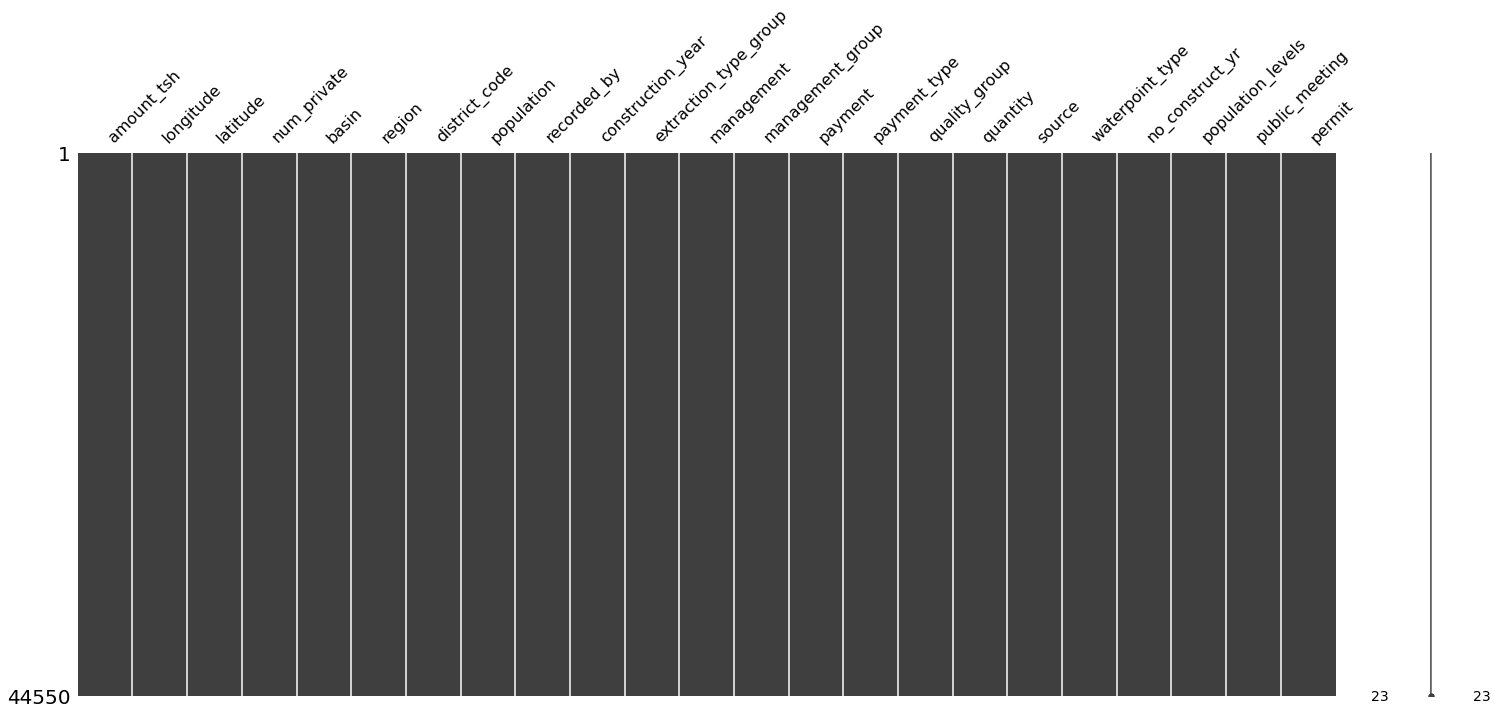

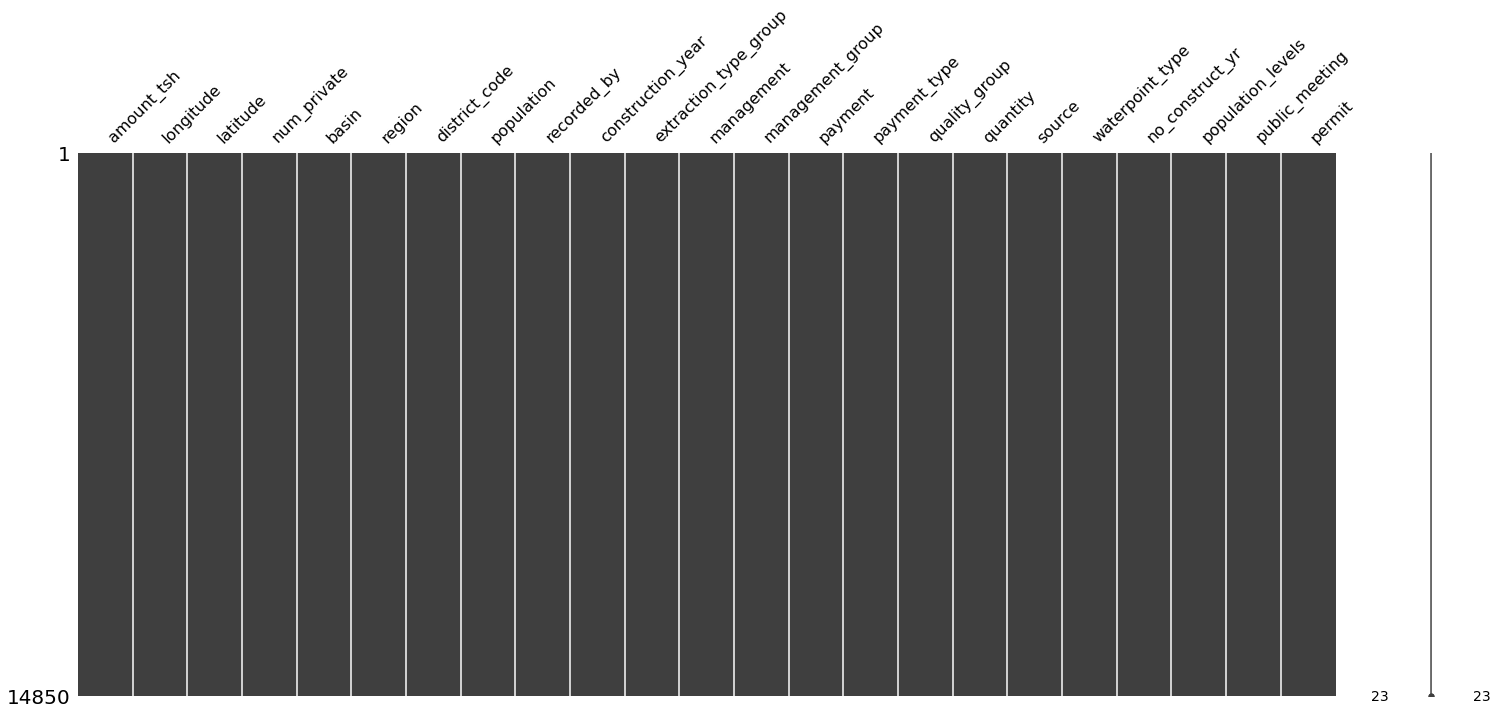

In [120]:
print(count_null(X_train_1))
print(dashes)
print(count_null(X_test_1))

#### One-Hot Encode Categoricals

In [121]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24947 to 56422
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   longitude              44550 non-null  float64
 2   latitude               44550 non-null  float64
 3   num_private            44550 non-null  int64  
 4   basin                  44550 non-null  object 
 5   region                 44550 non-null  object 
 6   district_code          44550 non-null  int64  
 7   population             44550 non-null  int64  
 8   recorded_by            44550 non-null  object 
 9   construction_year      44550 non-null  int64  
 10  extraction_type_group  44550 non-null  object 
 11  management             44550 non-null  object 
 12  management_group       44550 non-null  object 
 13  payment                44550 non-null  object 
 14  payment_type           44550 non-null  object 
 15

In [122]:
cat_cols = X_train_1.select_dtypes('O')
cat_cols.head()

,basin,region,recorded_by,extraction_type_group,management,management_group,payment,payment_type,quality_group,quantity,source,waterpoint_type,population_levels,public_meeting,permit
24947,Wami / Ruvu,Pwani,GeoData Consultants Ltd,submersible,vwc,user-group,pay per bucket,per bucket,salty,insufficient,machine dbh,communal standpipe,"2 to 5,000",True,True
22630,Lake Victoria,Mwanza,GeoData Consultants Ltd,nira/tanira,wug,user-group,unknown,unknown,good,enough,shallow well,hand pump,0,True,False
13789,Lake Victoria,Mwanza,GeoData Consultants Ltd,india mark ii,vwc,user-group,never pay,never pay,good,enough,machine dbh,hand pump,0,True,True
15697,Internal,Singida,GeoData Consultants Ltd,gravity,wua,user-group,never pay,never pay,good,seasonal,rainwater harvesting,communal standpipe,"2 to 5,000",True,True
22613,Lake Nyasa,Ruvuma,GeoData Consultants Ltd,gravity,vwc,user-group,unknown,unknown,good,dry,spring,communal standpipe,1,True,True


In [124]:
num_cols = X_train_1.select_dtypes('number')
len(num_cols.columns)

7

In [125]:
cat_cols.columns

Index(['basin', 'region', 'recorded_by', 'extraction_type_group', 'management',
       'management_group', 'payment', 'payment_type', 'quality_group',
       'quantity', 'source', 'waterpoint_type', 'population_levels',
       'public_meeting', 'permit'],
      dtype='object')

In [126]:
#'region','region_code','district_code'

cols_hot = ['basin', 'region', 'recorded_by', 'extraction_type_group',
       'management', 'management_group', 'payment',
       'payment_type', 'quality_group', 'quantity',
       'source', 'waterpoint_type', 'public_meeting', 'permit','no_construct_yr','population_levels']

def one_hot(df_train, df_test, columns=cols_hot):
    """
    function applies one-hot encoding categorical features 
    """
    one_hot_train = pd.get_dummies(df_train, columns=cols_hot, drop_first=True)
    one_hot_test = pd.get_dummies(df_test, columns=cols_hot, drop_first=True)
    
    return one_hot_train, one_hot_test

In [127]:
one_hot_train, one_hot_test = one_hot(X_train, X_test, cols_hot)

In [128]:
one_hot_train.shape, one_hot_test.shape

((44550, 104), (14850, 104))

In [129]:
one_hot_train.head(2)

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True,no_construct_yr_True,population_levels_1,"population_levels_2 to 5,000","population_levels_5,001 and above"
24947,20.0,38.123839,-6.087137e+00,0,1,80,1972,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
22630,250.0,35.005943,-2.000000e-08,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [130]:
one_hot_train['no_construct_yr_True'].dtype

dtype('uint8')

#### Scale the Data

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
def scale_data(sscaler, X_train_int, X_test_int,y_train):
    """
    fucntion sclaes the data
    """
    #scaler = sscaler
    #transform the training and test sets
    scaled_data_train = sscaler.fit_transform(X_train_int, y_train)
    scaled_data_test = sscaler.transform(X_test_int)
    #convert into a dataframe
    scaled_df_tra = pd.DataFrame(scaled_data_train, columns=X_train_int.columns)
    scaled_df_tes = pd.DataFrame(scaled_data_test, columns=X_test_int.columns)
    
    return scaled_df_tra, scaled_df_tes

In [133]:
train_scale, test_scale = scale_data(StandardScaler(),  one_hot_train, one_hot_test,y_train)

In [134]:
train_scale.shape, test_scale.shape

((44550, 104), (14850, 104))

In [135]:
train_scale.head()

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True,no_construct_yr_True,population_levels_1,"population_levels_2 to 5,000","population_levels_5,001 and above"
0,-0.147081,1.156133,-0.129019,-0.037802,-0.479998,-0.209732,0.702954,-0.302772,-0.209144,-0.349442,-0.455788,-0.420435,-0.393527,-0.287445,2.976669,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,-0.234014,4.63436,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,-0.401025,-0.348471,-0.078955,-0.045737,-0.089242,2.921563,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,0.681752,-0.123941,-0.22661,-0.211876,-0.351058,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,2.360664,-0.266779,-0.398608,-0.399969,-0.864801,-0.266779,-0.134188,2.360664,-0.398608,-0.062256,-2.422528,-0.1188,3.218090,-0.179992,-1.124921,1.711914,-0.269376,-0.11595,-0.122628,-0.113743,2.085065,-0.062437,-0.199242,-0.439821,-0.630801,-0.630975,-0.034185,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889,0.408462,0.729442,-0.729117,-0.367664,0.959905,-0.044234
1,-0.076877,-0.056318,1.940133,-0.037802,-0.479998,-0.379567,-1.371444,-0.302772,-0.209144,-0.349442,2.194003,-0.420435,-0.393527,-0.287445,-0.335946,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,4.273254,-0.21578,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,2.493608,-0.348471,-0.078955,-0.045737,-0.089242,-0.342283,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,-1.466809,-0.123941,-0.22661,-0.211876,2.848536,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,-0.423610,-0.266779,2.508727,-0.399969,-0.864801,-0.266779,-0.134188,-0.423610,2.508727,-0.062256,0.412792,-0.1188,-0.310743,-0.179992,0.888952,-0.584141,-0.269376,-0.11595,-0.12262

#### Imbalance

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
def smote_resample(y, X_train, y_train):
    """
    The target isn't balanced: functioning 54%, non-functioning 38%, functioning needs repair 7%
    This function balances target with SMOTE
    """
    # Previous original class distribution
    print('Original class distribution: \n')
    print(y.value_counts())
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    # Preview synthetic sample class distribution
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    
    return X_train_resampled, y_train_resampled

In [138]:
train_resampled, y_train_resampled = smote_resample(y, train_scale, y_train)

Original class distribution: 

0    32259
1    22824
2     4317
Name: target, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    24161
1    24161
0    24161
Name: target, dtype: int64


In [139]:
#df_1['lga'].value_counts(dropna=False)
train_resampled.head()

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True,no_construct_yr_True,population_levels_1,"population_levels_2 to 5,000","population_levels_5,001 and above"
0,-0.147081,1.156133,-0.129019,-0.037802,-0.479998,-0.209732,0.702954,-0.302772,-0.209144,-0.349442,-0.455788,-0.420435,-0.393527,-0.287445,2.976669,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,-0.234014,4.63436,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,-0.401025,-0.348471,-0.078955,-0.045737,-0.089242,2.921563,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,0.681752,-0.123941,-0.22661,-0.211876,-0.351058,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,2.360664,-0.266779,-0.398608,-0.399969,-0.864801,-0.266779,-0.134188,2.360664,-0.398608,-0.062256,-2.422528,-0.1188,3.218090,-0.179992,-1.124921,1.711914,-0.269376,-0.11595,-0.122628,-0.113743,2.085065,-0.062437,-0.199242,-0.439821,-0.630801,-0.630975,-0.034185,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889,0.408462,0.729442,-0.729117,-0.367664,0.959905,-0.044234
1,-0.076877,-0.056318,1.940133,-0.037802,-0.479998,-0.379567,-1.371444,-0.302772,-0.209144,-0.349442,2.194003,-0.420435,-0.393527,-0.287445,-0.335946,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,4.273254,-0.21578,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,2.493608,-0.348471,-0.078955,-0.045737,-0.089242,-0.342283,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,-1.466809,-0.123941,-0.22661,-0.211876,2.848536,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,-0.423610,-0.266779,2.508727,-0.399969,-0.864801,-0.266779,-0.134188,-0.423610,2.508727,-0.062256,0.412792,-0.1188,-0.310743,-0.179992,0.888952,-0.584141,-0.269376,-0.11595,-0.12262

In [140]:
y_train_resampled.head()

0    1
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [141]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score,f1_score, confusion_matrix,classification_report
from sklearn.metrics import precision_score

from yellowbrick.classifier import ROCAUC

from sklearn.model_selection import cross_val_score

In [142]:
y_train.dtype

dtype('int64')

### Create Model
recall-How good is our model at finding wells that don't work. Of postive class, what percentage did we find.

In [143]:
y_test.value_counts()

0    8098
1    5678
2    1074
Name: target, dtype: int64

In [144]:
y_train_resampled.value_counts()

2    24161
1    24161
0    24161
Name: target, dtype: int64

In [145]:
y_test.value_counts(normalize=True)

0    0.545320
1    0.382357
2    0.072323
Name: target, dtype: float64

#### Baseline Model

In [146]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

dummy_clf.score(train_scale, y_train)

0.542334455667789

In [147]:
import tzlocal
import datetime as dt#to get current time
tz = tzlocal.get_localzone()
print(tz)
start = dt.datetime.now(tz)
print(start.strftime("%m/%d/%y - %I:%m %p"))

America/New_York
10/13/20 - 12:10 PM


In [148]:
class Timer() :
    """
    class source code for Timer
    """
    
    def __init__(self, format_="%m/%d/%y - %I:%m %p"): #when we intialize class its going to perform these actions
        import tzlocal
        import datetime as dt#to get current time
        self.tz = tzlocal.get_localzone() #save and can call out whenever we want
        self.fmt = format_
        
        self.created_at =self.get_time()
        
    def get_time(self): 
        import datetime as dt
        return dt.datetime.now(self.tz)
    
    def start(self): #need to get the time
        time = self.get_time()
        self.start= time
        print(f"[i]Timer started at {self.start.strftime(self.fmt)}")
        
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i]Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total Time= {self.end - self.start}")
        

In [149]:

def eval_classification_model(class_model, X_train,X_test, y_train, y_test,
                              normalize='true',cmap='Blues',figsize=[10,5]):
    """
    Algorithm for classification model
    Args
     df (df)
     X_train (int)
     X_test ()
     y_train ()
     y_test ()
     figsize (dict)
    """
    #Classification Model
    
    timer = Timer()
    timer.start()
    print('\n')
    class_model.fit(X_train, y_train)
    
    
    # get Predictions
    y_hat_train = class_model.predict(X_train)
    y_hat_test =  class_model.predict(X_test)
    #evaluate model
    print("Training Accuracy on  Model: {}".format(accuracy_score(y_train, y_hat_train)))
    print("Testing Accuracy on  Model: {}".format(accuracy_score(y_test, y_hat_test)))
    # recall_score(y, lr.predict(X), average=None)
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None))) #average='micro'
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None)[1]))
    scores = cross_val_score(class_model,X_test, y_test,cv=5)
    print('Cross-validation scores on testing set: {}'.format(scores))
    print('Average cross-validation score on testing set: {:.2f}'.format(scores.mean()))
    
    print(dashes)
    print('\n')
    #adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
    ada_cf_matrix = confusion_matrix(y_hat_test,y_test)  #axes[0]
    print(ada_cf_matrix)
    print('\n')
    
    # Classification Report / Accuracy Score 
    print(dashes)
    print("Classification Report")
    print(dashes)
    classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
    print(metrics.classification_report(y_test,y_hat_test,target_names=classes))  
    print(dashes)
    print('\n')

    fig, axes = plt.subplots(ncols=2,figsize= figsize)   #ncols=2,
    #Confusion Matrix
    metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=normalize,
                                  cmap=cmap, ax=axes[0])  #axes[0]
    
    visualizer = ROCAUC(class_model, classes=["functioning", "non-functioning",'functioning needs repair'],ax=axes[1])
 #   plt.legend(handles=[visualizer], title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
 #   plt.legend((bbox_to_anchor=(0.4,0.8), loc="upper right")
    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    #plt.legend(visualizer,loc='center left', bbox_to_anchor=(1, 0.5))
    visualizer.show() 
    
    timer.stop()
    return class_model


#### Logistic Regression

[i]Timer started at 10/13/20 - 12:10 PM


Training Accuracy on  Model: 0.6419988135148932
Testing Accuracy on  Model: 0.6247811447811448
Recall: [0.62793282 0.61447693 0.65549348]
Recall: 0.6144769284959493
Cross-validation scores on testing set: [0.73198653 0.73030303 0.72255892 0.73063973 0.72390572]
Average cross-validation score on testing set: 0.73
------------------------------------------------------------


[[5085 1202  248]
 [ 915 3489  122]
 [2098  987  704]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.63      0.70      8098
1/Non-functioning       0.77      0.61      0.68      5678
   2/Needs Repair       0.19      0.66      0.29      1074

         accuracy                           0.62     14850
        macro avg       0.58      0.63      0.56     14850
     weighted avg       

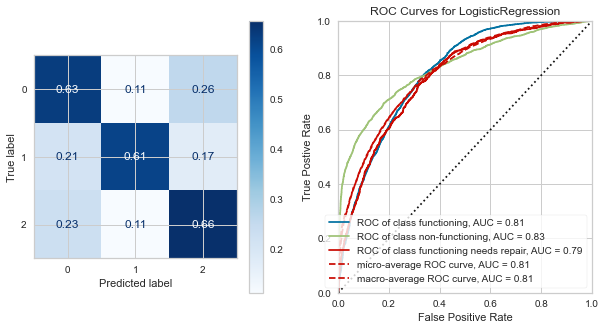

[i]Timer ended at 10/13/20 - 12:10 PM
- Total Time= 0:00:11.348143


In [150]:
model = eval_classification_model(LogisticRegression(), train_resampled, test_scale, 
                 y_train_resampled,y_test)

[i]Timer started at 10/13/20 - 12:10 PM


Training Accuracy on  Model: 0.6383565801636246
Testing Accuracy on  Model: 0.5833670033670033
Recall: [0.58619412 0.55125044 0.73184358]
Recall: 0.5512504402958789
Cross-validation scores on testing set: [0.68754209 0.6983165  0.68484848 0.7023569  0.68080808]
Average cross-validation score on testing set: 0.69
------------------------------------------------------------


[[4747 1133  202]
 [ 511 3130   86]
 [2840 1415  786]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.59      0.67      8098
1/Non-functioning       0.84      0.55      0.67      5678
   2/Needs Repair       0.16      0.73      0.26      1074

         accuracy                           0.58     14850
        macro avg       0.59      0.62      0.53     14850
     weighted avg       

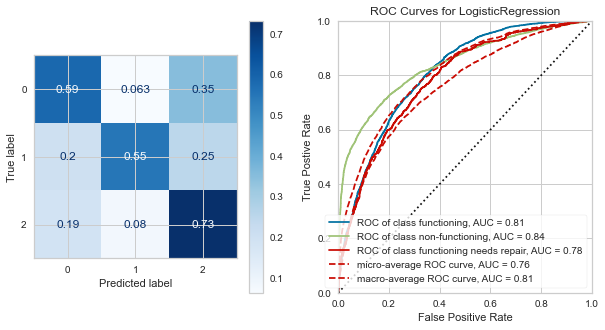

[i]Timer ended at 10/13/20 - 12:10 PM
- Total Time= 0:03:28.813262


In [151]:
# train_resampled, y_train_resampled
# functional':0,'non functional':1,'functional needs repair':2})
#, classes={0:'functional',1:'non functional',2:'functional needs repair'}

model = eval_classification_model(LogisticRegression(fit_intercept=False, C=1e12, 
                solver='liblinear'), train_resampled, test_scale, 
                 y_train_resampled,y_test)

#### GridsearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
#f1 score-averaging
model = LogisticRegression()
params = {'C':[1e12, 0.001, 0.01, 0.1, 1,10, 100], 'fit_intercept':[True,False]}
gridsearch = GridSearchCV(model,params, scoring='recall_macro')

In [153]:
# train_resampled, y_train_resampled
gridsearch.fit(train_resampled, y_train_resampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1000000000000.0, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False]},
             scoring='recall_macro')

In [154]:
#of all params it tried thi gave it hte highest score
best_params = gridsearch.best_params_
best_params

{'C': 1000000000000.0, 'fit_intercept': True}

In [155]:
#this is hte actual model it trained
best_model = gridsearch.best_estimator_
best_model

LogisticRegression(C=1000000000000.0)

[i]Timer started at 10/13/20 - 12:10 PM


Training Accuracy on  Model: 0.6417504794227612
Testing Accuracy on  Model: 0.6250505050505051
Recall: [0.62842677 0.61465305 0.65456238]
Recall: 0.6146530468474815
Cross-validation scores on testing set: [0.73232323 0.73030303 0.72424242 0.73030303 0.72323232]
Average cross-validation score on testing set: 0.73
------------------------------------------------------------


[[5089 1202  251]
 [ 915 3490  120]
 [2094  986  703]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.63      0.70      8098
1/Non-functioning       0.77      0.61      0.68      5678
   2/Needs Repair       0.19      0.65      0.29      1074

         accuracy                           0.63     14850
        macro avg       0.58      0.63      0.56     14850
     weighted avg       

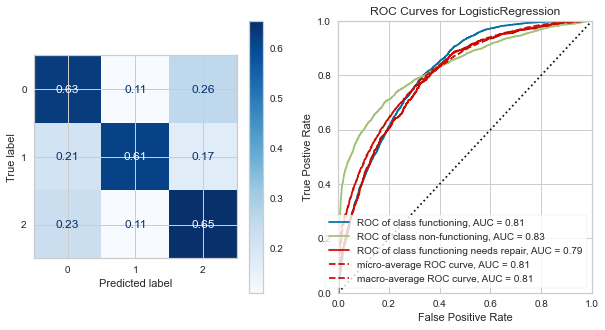

[i]Timer ended at 10/13/20 - 12:10 PM
- Total Time= 0:00:07.480789


In [156]:
# accuracy      0.63     14850
model = eval_classification_model(best_model,train_resampled, test_scale,y_train_resampled, y_test) #,classes=['Died','Survived']

#### K Nearest Neighbors Classifier

In [157]:
from sklearn.neighbors import KNeighborsClassifier

[i]Timer started at 10/13/20 - 12:10 PM


Training Accuracy on  Model: 0.8662720913869459
Testing Accuracy on  Model: 0.722020202020202
Recall: [0.73907138 0.73406129 0.52979516]
Recall: 0.7340612891863332
Cross-validation scores on testing set: [0.71548822 0.72592593 0.71986532 0.71212121 0.71616162]
Average cross-validation score on testing set: 0.72
------------------------------------------------------------


[[5985 1093  337]
 [1170 4168  168]
 [ 943  417  569]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.81      0.74      0.77      8098
1/Non-functioning       0.76      0.73      0.75      5678
   2/Needs Repair       0.29      0.53      0.38      1074

         accuracy                           0.72     14850
        macro avg       0.62      0.67      0.63     14850
     weighted avg       0

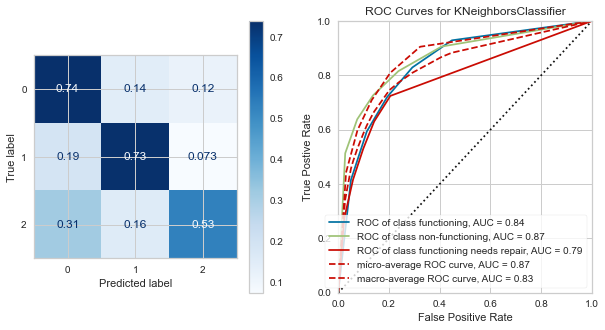

[i]Timer ended at 10/13/20 - 01:10 PM
- Total Time= 0:20:24.613261


In [158]:
#train_resampled, test_scale,y_train_resampled, y_test
model = eval_classification_model(KNeighborsClassifier(), 
                                                    train_resampled, test_scale, y_train_resampled,y_test)

#### KNN / Gridsearch

In [159]:
model = KNeighborsClassifier()
params = {'n_neighbors':range(1, 13, 2)} #1,26,2

gridsearch = GridSearchCV(model,params, scoring='recall_macro',cv=3) #f1_macro
gridsearch.fit(train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 13, 2)},
             scoring='recall_macro')

In [160]:
best_params_k6 = gridsearch.best_params_
best_params_k6

{'n_neighbors': 1}

In [161]:
best_model_k6 = gridsearch.best_estimator_
best_model_k6

KNeighborsClassifier(n_neighbors=1)

[i]Timer started at 10/13/20 - 03:10 PM


Training Accuracy on  Model: 0.9863692176096464
Testing Accuracy on  Model: 0.7347474747474747
Recall: [0.76957273 0.74339556 0.4264432 ]
Recall: 0.7433955618175414
Cross-validation scores on testing set: [0.6973064  0.71077441 0.7047138  0.71043771 0.6973064 ]
Average cross-validation score on testing set: 0.70
------------------------------------------------------------


[[6232 1182  439]
 [1223 4221  177]
 [ 643  275  458]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.79      0.77      0.78      8098
1/Non-functioning       0.75      0.74      0.75      5678
   2/Needs Repair       0.33      0.43      0.37      1074

         accuracy                           0.73     14850
        macro avg       0.63      0.65      0.63     14850
     weighted avg       

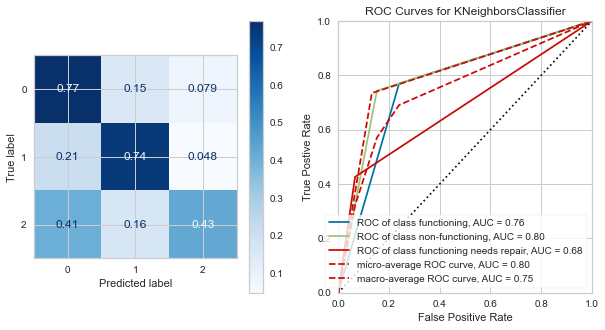

[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:15:50.875841


In [162]:
knn_model = eval_classification_model(best_model_k6,train_resampled, test_scale,y_train_resampled, y_test) #,classes=['Died','Survived']

#### Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

[i]Timer started at 10/13/20 - 03:10 PM


Training Accuracy on  Model: 0.9954058192955589
Testing Accuracy on  Model: 0.7775757575757576
Recall: [0.81489257 0.78161324 0.47486034]
Recall: 0.7816132441000352
Cross-validation scores on testing set: [0.76936027 0.76835017 0.75690236 0.76531987 0.75117845]
Average cross-validation score on testing set: 0.76
------------------------------------------------------------


[[6599 1031  412]
 [ 933 4438  152]
 [ 566  209  510]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.82      0.81      0.82      8098
1/Non-functioning       0.80      0.78      0.79      5678
   2/Needs Repair       0.40      0.47      0.43      1074

         accuracy                           0.78     14850
        macro avg       0.67      0.69      0.68     14850
     weighted avg       

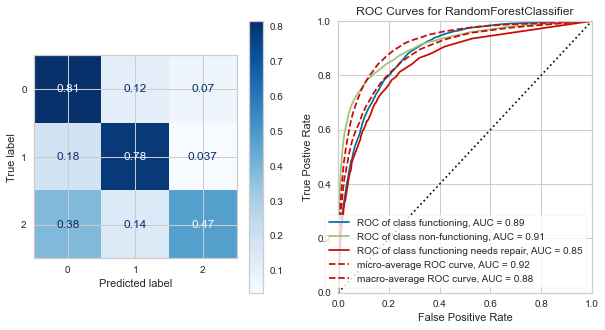

[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:00:25.251567


In [164]:
"""
(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced'

"""
rforest = eval_classification_model(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

In [165]:
rforest

RandomForestClassifier(n_jobs=-1, random_state=42)

In [166]:
df_import = pd.Series(rforest.feature_importances_,index=train_resampled.columns, name='Importance')
df_import.sort_values()

waterpoint_type_dam                      0.000013
management_other - school                0.000105
population_levels_5,001 and above        0.000157
source_unknown                           0.000196
extraction_type_group_other motorpump    0.000232
                                           ...   
quantity_enough                          0.042948
population                               0.047697
construction_year                        0.063289
latitude                                 0.152617
longitude                                0.153305
Name: Importance, Length: 104, dtype: float64

In [167]:
def plot_importance(forest, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(forest.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance

amount_tsh                           0.022884
longitude                            0.153305
latitude                             0.152617
num_private                          0.001893
district_code                        0.042682
                                       ...   
permit_True                          0.016360
no_construct_yr_True                 0.005303
population_levels_1                  0.008480
population_levels_2 to 5,000         0.008776
population_levels_5,001 and above    0.000157
Length: 104, dtype: float64

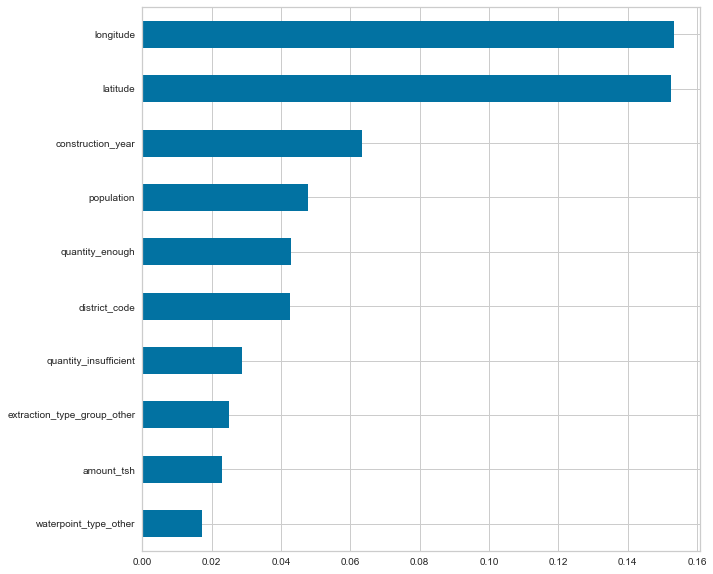

In [168]:
plot_importance(rforest)

In [169]:
def ensemble_features(forest, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(forest.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance
    

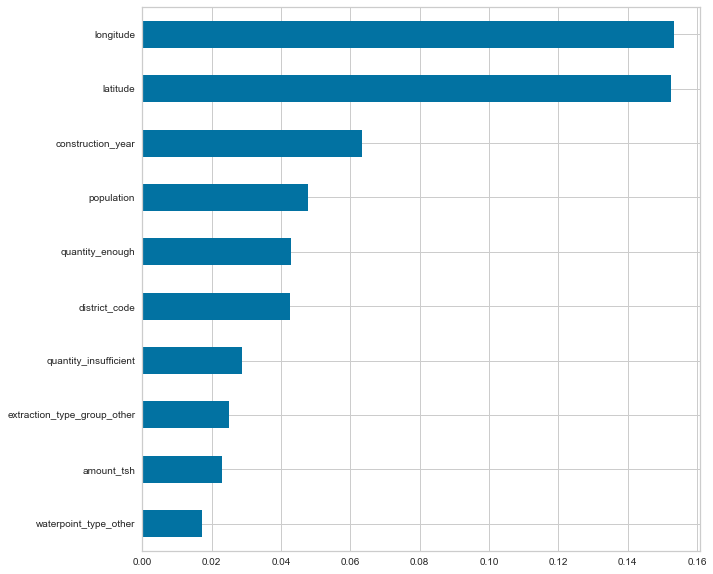

In [170]:
#top 10 imporant features as determined by our model
#what were most important things in determing the output
forest_1 = ensemble_features(rforest)

In [171]:
param_grid = {"criterion":["gini",'entropy'],
                 'max_depth':[None,3],#[None,5,3,8,10]
                 'max_features':['auto','sqrt',3,5]}#list of options

forest_2 = RandomForestClassifier()
grid_clf = GridSearchCV(forest_2, param_grid)

timer = Timer()
timer.start()

grid_clf.fit(train_resampled, y_train_resampled)

timer.stop()

[i]Timer started at 10/13/20 - 03:10 PM
[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:11:55.766504


In [172]:
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}

[i]Timer started at 10/13/20 - 03:10 PM


Training Accuracy on  Model: 0.9281900583585116
Testing Accuracy on  Model: 0.7786531986531987
Recall: [0.81020005 0.78090877 0.52886406]
Recall: 0.7809087706939063
Cross-validation scores on testing set: [0.78282828 0.78282828 0.77609428 0.78653199 0.76531987]
Average cross-validation score on testing set: 0.78
------------------------------------------------------------


[[6561  983  366]
 [ 825 4434  140]
 [ 712  261  568]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.83      0.81      0.82      8098
1/Non-functioning       0.82      0.78      0.80      5678
   2/Needs Repair       0.37      0.53      0.43      1074

         accuracy                           0.78     14850
        macro avg       0.67      0.71      0.68     14850
     weighted avg       

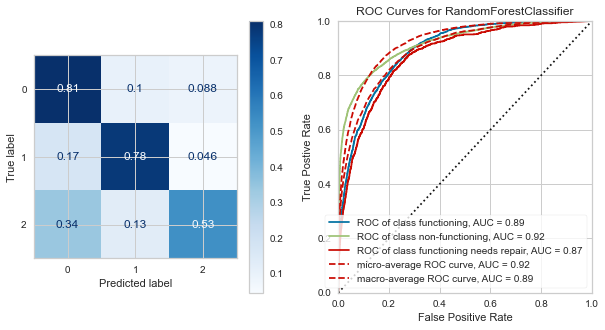

[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:01:04.418692


In [173]:
"""
(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25

"""
rforest = eval_classification_model(RandomForestClassifier(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

#### Adaboost and Gradient Boosting classifiers 

In [174]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

[i]Timer started at 10/13/20 - 03:10 PM


Training Accuracy on  Model: 0.6484692962487756
Testing Accuracy on  Model: 0.6107744107744107
Recall: [0.62595703 0.59087707 0.60148976]
Recall: 0.5908770693906304
Cross-validation scores on testing set: [0.71750842 0.71043771 0.7003367  0.71414141 0.70909091]
Average cross-validation score on testing set: 0.71
------------------------------------------------------------


[[5069 1222  274]
 [1054 3355  154]
 [1975 1101  646]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.77      0.63      0.69      8098
1/Non-functioning       0.74      0.59      0.66      5678
   2/Needs Repair       0.17      0.60      0.27      1074

         accuracy                           0.61     14850
        macro avg       0.56      0.61      0.54     14850
     weighted avg       

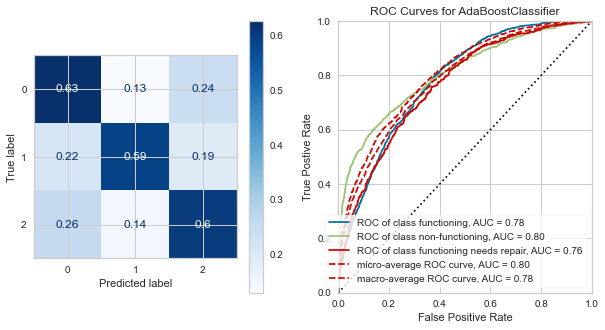

[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:00:19.185613


In [175]:
adaboost = eval_classification_model(AdaBoostClassifier(random_state=42), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

[i]Timer started at 10/13/20 - 03:10 PM


Training Accuracy on  Model: 0.7270118510547301
Testing Accuracy on  Model: 0.6756902356902357
Recall: [0.70572981 0.64547376 0.60893855]
Recall: 0.6454737583656217
Cross-validation scores on testing set: [0.75252525 0.74781145 0.74410774 0.75016835 0.73905724]
Average cross-validation score on testing set: 0.75
------------------------------------------------------------


[[5715 1306  291]
 [ 776 3665  129]
 [1607  707  654]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.71      0.74      8098
1/Non-functioning       0.80      0.65      0.72      5678
   2/Needs Repair       0.22      0.61      0.32      1074

         accuracy                           0.68     14850
        macro avg       0.60      0.65      0.59     14850
     weighted avg       

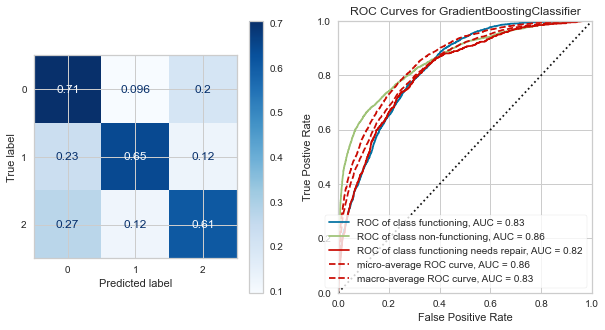

[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:02:46.768158


In [176]:
#gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_clf = eval_classification_model(GradientBoostingClassifier(random_state=42), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

#### XGBoost

In [177]:
import xgboost as xgb

[i]Timer started at 10/13/20 - 03:10 PM


Training Accuracy on  Model: 0.8533173295807293
Testing Accuracy on  Model: 0.756969696969697
Recall: [0.79291183 0.73934484 0.57914339]
Recall: 0.7393448397323001
Cross-validation scores on testing set: [0.77643098 0.76801347 0.77710438 0.77138047 0.76936027]
Average cross-validation score on testing set: 0.77
------------------------------------------------------------


[[6421 1125  337]
 [ 756 4198  115]
 [ 921  355  622]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.81      0.79      0.80      8098
1/Non-functioning       0.83      0.74      0.78      5678
   2/Needs Repair       0.33      0.58      0.42      1074

         accuracy                           0.76     14850
        macro avg       0.66      0.70      0.67     14850
     weighted avg       0

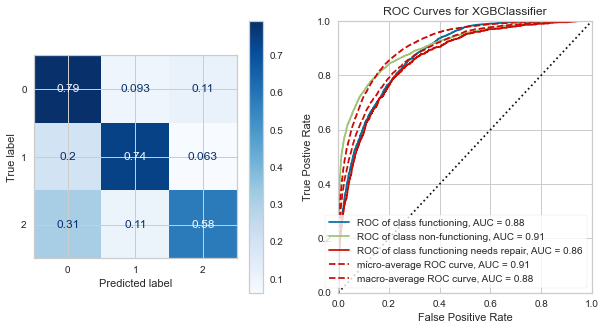

[i]Timer ended at 10/13/20 - 03:10 PM
- Total Time= 0:03:00.714174


In [178]:
#xgb.XGBClassifier()
xgb_clf = eval_classification_model(xgb.XGBClassifier(), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

#### Geospatial Visualization

In [179]:
df_1['latitude'].value_counts(dropna=False)

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [180]:
df_1['longitude'].value_counts(normalize=True)

35.005943    0.030505
39.093095    0.000034
32.987511    0.000034
32.926012    0.000034
39.086287    0.000034
               ...   
33.196490    0.000017
34.017119    0.000017
33.788326    0.000017
37.371204    0.000017
35.005922    0.000017
Name: longitude, Length: 57516, dtype: float64

In [181]:
def get_center_latlong(df_1):
    # get the center of my map for plotting
    centerlat = (df_1['latitude'].max() + df_1['latitude'].min()) / 2
    centerlong = (df_1['longitude'].max() + df_1['longitude'].min()) / 2
    return centerlat, centerlong


In [182]:
# import geopandas

# gdf = geopandas.GeoDataFrame(
#         df, geometry=geopandas.points_from_xy(df_1.longitude, df_1.latitude))

# functional = gdf.where(gdf['target'] == 'functional')
# repair = gdf.where(gdf['target'] == 'functional needs repair')
# broken = gdf.where(gdf['target'] == 'non functional')

# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# # We restrict to Africa
# ax = world[world.continent == 'Africa'].plot(
#     color='white', edgecolor='gray')

# ax.scatter(functional['longitude'], functional['latitude'],
#            c='green',alpha=.5, s=1)

# ax.scatter(repair['longitude'], repair['latitude'],
#            c='yellow', alpha=.5, s=1)

# ax.scatter(broken['longitude'], broken['latitude'],
#            c='red', alpha=.5, s=1)

# plt.ylim(-12, 0)
# plt.xlim(28,41)

# plt.show()
import folium

# grab the center of our map using our cool function
center = get_center_latlong(df_1)

# create a new map object
m = folium.Map(location=center, zoom_start=10)

# save our map to an interactive html file
m.save('circle_map.html')

In [183]:
# Same as before, we get the center and make the map object
center = get_center_latlong(df_1)
m = folium.Map(location=center, zoom_start=10)

# go through each home in set, make circle, and add to map.
for i in range(len(df_1)):
    folium.Circle(
        location=[df_1.iloc[i]['latitude'], df_1.iloc[i]['longitude']],
        radius=10,
    ).add_to(m)

# Same as before, we save it to file
m.save('circle_map.html')

In [184]:
df_2 = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')
df_2['target'] = labels['status_group']

In [185]:
df_2.columns[df_2.isin(['0']).any()] 

Index(['funder', 'installer'], dtype='object')

### Findings
I created 7 classification models.  The accuracy score metric for performance of the models ranged from 58% to 78%.  I also focused on how well the models are accurate in predicting the non-functioning status of wells.<br>
I created a KNearest Neighbors Classifier with GridSearch and included a range of 1 to 13.  Surprisingly that only gave an accuracy of 74%.  I thought it would do better since it's interating through data and creating 13 difference models and getting the best score.<br>
I also created a RandomForest Classifier with 200 estimators and that gave the best result with 78% accuracy overall and 78% accuracy in predicting the non-functioning wells.  I thought RandomForest would provide a high score because with an n_estimator of 200 which is the number of trees in the foreset.

### Recommendatons
There is critcal data that is missing.  Need this information for a more accurate picture of the operational status of water points.
Regarding construction years, there is a category with values of 0 which are 35% of feature.  Need data on which years the 0 represents so we know when they were built so we know how many were built in these years and how old there are.<br>
Regarding population, there are values with 0 and 1 which represents 40% and 12% of the feature, respectively. Need to confirm that population is 0 and 1.<br>

What needs to be done for accurate status of wells:<br>
Need additional data 2014 to the present.  
35% of values for years of construction are 0. Need values for years. Don’t know how old these wells are.<br> 
Status of operation of wells:
‘construction_year’ between years 2000 and 2013 in no year is there a higher probability of finding a non-functioning well than a functioning well.  All years had a higher probability of functioning wells.<br>
Regarding ‘population_levels’ .  Graph demonstrates that in areas with population of 1 there is a higher probability of finding a non-functioning water points.<br>
 Regarding ‘quantity_enough’ of water in water_wells, there is a higher probability of finding a functioning well than a non-functioning well.<br>
 Regarding ‘quantity_insufficient’ of water in water_wells, there is a higher probability of finding a functioning well than a non-functioning well.  However, there is not a big difference between the two.<br>
‘district_code’ reveals operation status of wells by district.  There is a higher probability of finding a non-functioning well in Districts 33, 53, and 63.<br>
 